# Predição da produtividade na agricultura (Random Forest)

Aluno: Flavio Rocha de Avila 

## Introdução

Estima-se que a população mundial será de 9,8 bilhões até o ano de 2050 (United Nations, 2017).
O Brasil é o maior produtor mundial de grãos (Conab, 2021) e o declínio da taxa de crescimento do rendimento das colheitas (Fugile, 2018) é preocupante, onde a instabilidade climática é o principal desafio esperado para a produção de grãos no Brasil (Sentelhas, 2015). A implementação proposta será  a predição de produção de milho, soja e arroz, utilizando-se um dataset de dados históricos (2017-2020) de área plantada x produção x temperatura x quantidade de chuva de diversas regiões do Brasil.  
  
A solução apresentada é a predição da produtividade da cultura plantada a partir das informações históricas, utilizando-se Random Forest e ainda o cálculo de acurácia comparado com arvore de decisão. A linguagem utilizada é o Phyton (Jupyter Notebook) em conjunto com as bibliotecas Panda (análise e manipulação de dados), IPython: O IPython (ferramenta de cálculo e visualização), OS (funções para interagir com o sistema operacional), Scikit-Learn (treino das técnicas de estatística e Machine Learning) e Graphviz (visualização de gráficos).

## Desenvolvimento

In [1]:
from IPython.core.display import display, HTML
import pandas as pd
import os

display(HTML('<u>Lista arquivos do diretório "dataset"</u>:'))
print(os.listdir("dataset"))

['pred_arroz.csv', 'pred_grao.csv', 'pred_milho.csv', 'pred_soja.csv', 'teste_arroz.csv', 'teste_grao.csv', 'teste_milho.csv', 'teste_soja.csv', 'treino_arroz.csv', 'treino_grao.csv', 'treino_milho.csv', 'treino_soja.csv']


O código aciam importa a lista de arquivos de dados disponíveis no diretório 'dataset'

In [2]:
pasta = "dataset"

treino_grao = pd.read_csv(pasta + "\\treino_grao.csv")
teste_grao = pd.read_csv(pasta + "\\teste_grao.csv")

display(HTML('<b>Conteúdo  do arquivo "teste_grao.csv":</b>'))

print(teste_grao)


    dataId    Regiao  ano_agricola  uf produto  area_plantada_mil_ha  \
0        7       Sul          2021  SC   ARROZ                   149   
1        9   Sudeste          2017  MG   ARROZ                     6   
2       19   Sudeste          2017  ES   MILHO                    13   
3       21   Sudeste          2018  ES   MILHO                    13   
4       34  Nordeste          2017  PB   ARROZ                     1   
5       41  Nordeste          2018  RN   ARROZ                     1   
6       43  Nordeste          2019  AL   ARROZ                     3   
7       44  Nordeste          2019  CE   ARROZ                     4   
8       45  Nordeste          2019  PB   ARROZ                     1   
9       54  Nordeste          2020  SE   ARROZ                     4   
10      56  Nordeste          2021  CE   ARROZ                     5   
11      57  Nordeste          2021  PB   ARROZ                     2   
12      65  Nordeste          2018  AL   MILHO                  

O código acima salva o conteudo do arquivo treino_grao.csv na variável treino_grao e o salva o conteúdo do arquivo teste_grao.csv na variável teste_grao. Após este processo é apresentado o cabeçalho e os registros (dados) do arquivo teste_grao.csv.

In [3]:
display(HTML('<b>Verifica se há alguma célula com valor "null"</b>'))

print(teste_grao.isnull().sum())

dataId                        0
Regiao                        0
ano_agricola                  0
uf                            0
produto                       0
area_plantada_mil_ha          0
producao_mil_t                0
produtividade_mil_ha_mil_t    0
temperatura                   0
chuvas                        0
dtype: int64


A verificação relizada acima é necessária para garantir a concistência e integridade da base dados. Caso haja algum dado faltante/inconsistente deve-se corrigi-lo ou excluí-lo.

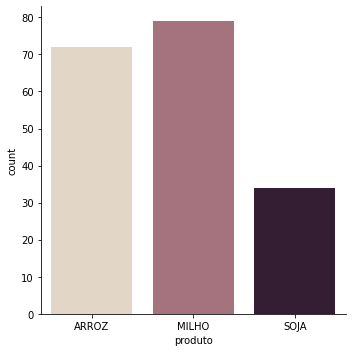

In [4]:
display(HTML('<b>Produção por tipo de grãos</b>'))

import matplotlib.pyplot as plt
import seaborn as sns

sns.catplot(x="produto", kind="count", palette="ch:.23", data=treino_grao)

O código acima é útil quando precisamos visualizar graficamente as quantidades de registros de interesse da base de dados. No exemplo acima pode-se visualizar o vlolume de produção para os grãos do dataset treino_grao.csv.

In [5]:
display(HTML('<b>Codificando categorias das colunas</b>'))


#produto = {"MILHO":1,"ARROZ":2,"SOJA":3} 
treino_grao['produto'] = treino_grao['produto'].replace('MILHO', 1)
treino_grao['produto'] = treino_grao['produto'].replace('ARROZ', 2)
treino_grao['produto'] = treino_grao['produto'].replace('SOJA', 3)

#regiao = {"Norte":1,"Nordeste":2,"Centro":3, "Sudeste":4, "Sul",5} 
treino_grao['Regiao'] = treino_grao['Regiao'].replace('Norte', 1)
treino_grao['Regiao'] = treino_grao['Regiao'].replace('Nordeste', 2)
treino_grao['Regiao'] = treino_grao['Regiao'].replace('Centro', 3)
treino_grao['Regiao'] = treino_grao['Regiao'].replace('Sudeste', 4)
treino_grao['Regiao'] = treino_grao['Regiao'].replace('Sul', 5)

#estado
treino_grao['uf'] = treino_grao['uf'].replace('AC', 0)
treino_grao['uf'] = treino_grao['uf'].replace('AL', 1)
treino_grao['uf'] = treino_grao['uf'].replace('AM', 2)
treino_grao['uf'] = treino_grao['uf'].replace('AP', 3)
treino_grao['uf'] = treino_grao['uf'].replace('BA', 4)
treino_grao['uf'] = treino_grao['uf'].replace('CE', 5)
treino_grao['uf'] = treino_grao['uf'].replace('DF', 6)
treino_grao['uf'] = treino_grao['uf'].replace('ES', 7)
treino_grao['uf'] = treino_grao['uf'].replace('GO', 8)
treino_grao['uf'] = treino_grao['uf'].replace('MA', 9)
treino_grao['uf'] = treino_grao['uf'].replace('MG', 10)
treino_grao['uf'] = treino_grao['uf'].replace('MS', 11)
treino_grao['uf'] = treino_grao['uf'].replace('MT', 12)
treino_grao['uf'] = treino_grao['uf'].replace('PA', 13)
treino_grao['uf'] = treino_grao['uf'].replace('PB', 14)
treino_grao['uf'] = treino_grao['uf'].replace('PI', 15)
treino_grao['uf'] = treino_grao['uf'].replace('PR', 16)
treino_grao['uf'] = treino_grao['uf'].replace('RJ', 17)
treino_grao['uf'] = treino_grao['uf'].replace('RN', 18)
treino_grao['uf'] = treino_grao['uf'].replace('RO', 19)
treino_grao['uf'] = treino_grao['uf'].replace('RR', 20)
treino_grao['uf'] = treino_grao['uf'].replace('RS', 21)
treino_grao['uf'] = treino_grao['uf'].replace('SC', 22)
treino_grao['uf'] = treino_grao['uf'].replace('SE', 23)
treino_grao['uf'] = treino_grao['uf'].replace('SP', 24)
treino_grao['uf'] = treino_grao['uf'].replace('TO', 25)

print(treino_grao)

     dataId  Regiao  ano_agricola  uf  produto  area_plantada_mil_ha  \
0         1       5          2018  16        2                    23   
1         2       5          2018  21        2                  1078   
2         3       5          2019  16        2                    23   
3         4       5          2019  22        2                   144   
4         5       5          2020  16        2                    22   
..      ...     ...           ...  ..      ...                   ...   
180     232       1          2021   3        3                     5   
181     233       1          2021  13        3                   732   
182     234       1          2021  19        3                   396   
183     235       1          2021  20        3                    70   
184     236       1          2021  25        3                  1119   

     producao_mil_t  produtividade_mil_ha_mil_t  temperatura  chuvas safra  
0               131                        5695         18

O código acima transforma variáveis do tipo str (nomes) em variáveis núméricas (int) que servirão para alimentar o modelo de predição.

In [6]:
from sklearn.model_selection import train_test_split

X_treino_total = treino_grao.drop('safra',axis = 1)
y_treino_total = treino_grao['safra']

x_treino, x_teste, y_treino, y_teste = train_test_split(X_treino_total, y_treino_total, test_size=0.8, random_state=120)

display(HTML('<b>Variáveis do modelo: </b>'))
print(list(x_treino))



['dataId', 'Regiao', 'ano_agricola', 'uf', 'produto', 'area_plantada_mil_ha', 'producao_mil_t', 'produtividade_mil_ha_mil_t', 'temperatura', 'chuvas']


O código acima cria o modelo de árvore de decisão utilizando o parâmetro safra como referência.

In [7]:
from sklearn import tree
from graphviz import Source
from sklearn.tree import export_graphviz
import joblib

decision_tree = tree.DecisionTreeClassifier(max_depth=5)

decision_tree = decision_tree.fit(x_treino,y_treino)

O código acima monta o modelo de árvore de decisão utilizando o parâmetro safra como referência.

In [8]:
dot_data = tree.export_graphviz(decision_tree, feature_names = list(x_treino),class_names = ['Boa', 'Ruim'],out_file = None ) 
graph = Source(dot_data) 
graph.render("arvore_treino")

'arvore_treino.pdf'

O código acima exporta o modelo gráfico de árvore de decisão resultante para o arquivo arvore_treino.pdf.

In [9]:
display(HTML('<b> Cálculo da validação cruzada para a árvore de decisão</b>'))

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

print(cross_val_score(decision_tree, x_teste, y_teste, cv = 10)) 
pred = decision_tree.predict(x_teste)
print('Acurácia de', accuracy_score(pred, y_teste)*100, '%')

[1.         0.8        0.93333333 0.93333333 1.         1.
 0.93333333 1.         0.85714286 1.        ]
Acurácia de 79.72972972972973 %


O código acima calcula o valor ada acurácia da validação cruzada para a árvore de decisão.

In [10]:
display(HTML('<b> Cálculo da validação cruzada para Random Forest</b>'))
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 9)
model_rf = clf.fit(x_treino, y_treino) 

print(cross_val_score(model_rf, x_teste, y_teste, cv = 10)) 
pred = model_rf.predict(x_teste)
print('Acuracia de', accuracy_score(pred, y_teste)*100,'%')

[1.         1.         0.93333333 0.93333333 0.93333333 0.93333333
 0.93333333 1.         0.92857143 0.92857143]
Acuracia de 81.75675675675676 %


O código acima calcula o valor ada acurácia da validação cruzada para Random Forest.